In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
parquet_base_path = "/Users/aditshrimal/Desktop/MSDS/summer23/assignments/log-analytics/output"

In [6]:
# Get a list of all the Parquet files in the directory
parquet_files = glob.glob(parquet_base_path+'/content_size/*.parquet')

In [10]:
# Initialize an empty DataFrame
df_requests_per_content_size = pd.DataFrame()

# Loop through the list of Parquet files and append each file to the DataFrame
for file in parquet_files:
    df_requests_per_content_size = df_requests_per_content_size.append(pd.read_parquet(file), ignore_index=True)

/var/folders/f4/x8rpzln53m74t22gm11_r1f80000gn/T/ipykernel_67500/3544554905.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_requests_per_content_size = df_requests_per_content_size.append(pd.read_parquet(file), ignore_index=True)
/var/folders/f4/x8rpzln53m74t22gm11_r1f80000gn/T/ipykernel_67500/3544554905.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_requests_per_content_size = df_requests_per_content_size.append(pd.read_parquet(file), ignore_index=True)
/var/folders/f4/x8rpzln53m74t22gm11_r1f80000gn/T/ipykernel_67500/3544554905.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_requests_per_content_size = df_requests_per_content_size.append(pd.read_parquet(file), ignore_index=True)


In [18]:
df_requests_per_content_size

,content_size,start,end,count
0,2333,2016-12-31 03:00:00,2016-12-31 06:00:00,2
1,56026,2005-01-16 21:00:00,2005-01-17 00:00:00,2
2,932,2004-05-07 06:00:00,2004-05-07 09:00:00,2
3,32532,2009-04-30 03:00:00,2009-04-30 06:00:00,2
4,10617,2006-08-10 15:00:00,2006-08-10 18:00:00,2
...,...,...,...,...
299927,50148,2017-10-13 18:00:00,2017-10-13 21:00:00,2
299928,9878,2008-02-22 21:00:00,2008-02-23 00:00:00,2
299929,24943,2004-09-22 21:00:00,2004-09-23 00:00:00,2
299930,5845,2005-12-04 06:00:00,2005-12-04 09:00:00,2


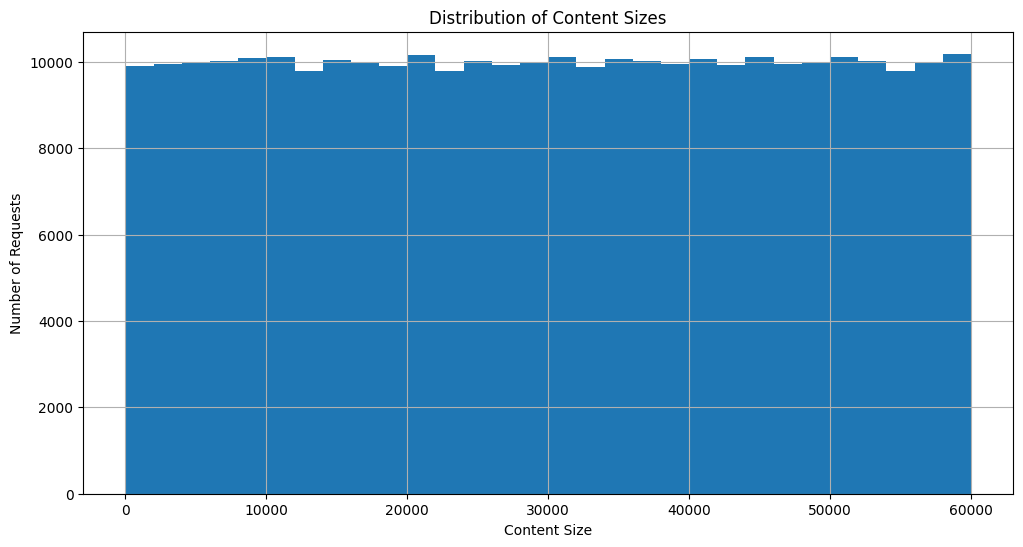

In [11]:
# Histogram of the content sizes of the requests
df_requests_per_content_size['content_size'].hist(bins=30, figsize=(12,6))
plt.title('Distribution of Content Sizes')
plt.xlabel('Content Size')
plt.ylabel('Number of Requests')
plt.show()


In [15]:
parquet_files = glob.glob(parquet_base_path+'/requests/*.parquet')

# Initialize an empty DataFrame
df_requests_per_host = pd.DataFrame()

# Loop through the list of Parquet files and append each file to the DataFrame
for file in parquet_files:
    df_requests_per_host = df_requests_per_host.append(pd.read_parquet(file), ignore_index=True)

/var/folders/f4/x8rpzln53m74t22gm11_r1f80000gn/T/ipykernel_67500/4025648148.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_requests_per_host = df_requests_per_host.append(pd.read_parquet(file), ignore_index=True)
/var/folders/f4/x8rpzln53m74t22gm11_r1f80000gn/T/ipykernel_67500/4025648148.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_requests_per_host = df_requests_per_host.append(pd.read_parquet(file), ignore_index=True)
/var/folders/f4/x8rpzln53m74t22gm11_r1f80000gn/T/ipykernel_67500/4025648148.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_requests_per_host = df_requests_per_host.append(pd.read_parquet(file), ignore_index=True)


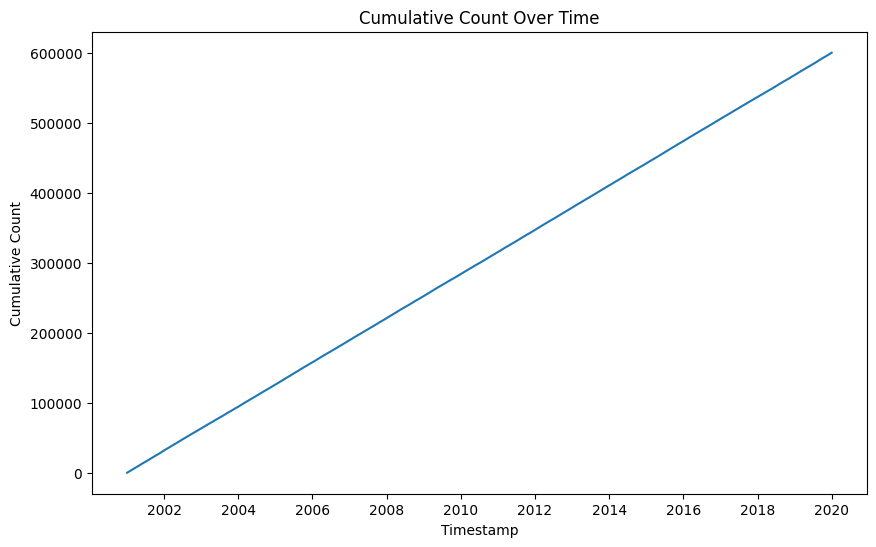

In [21]:
# Assuming df is your DataFrame
df_requests_per_host['start'] = pd.to_datetime(df_requests_per_host['start'])  # Ensure 'start' is in datetime format
df_sorted = df_requests_per_host.sort_values('start')

# Group by 'start', sum 'count', and then calculate cumulative sum
df_cumulative = df_sorted.groupby('start')['count'].sum().cumsum().reset_index()

# Plotting
plt.figure(figsize=(10,6))
plt.plot(df_cumulative['start'], df_cumulative['count'])
plt.xlabel('Timestamp')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Count Over Time')
plt.show()

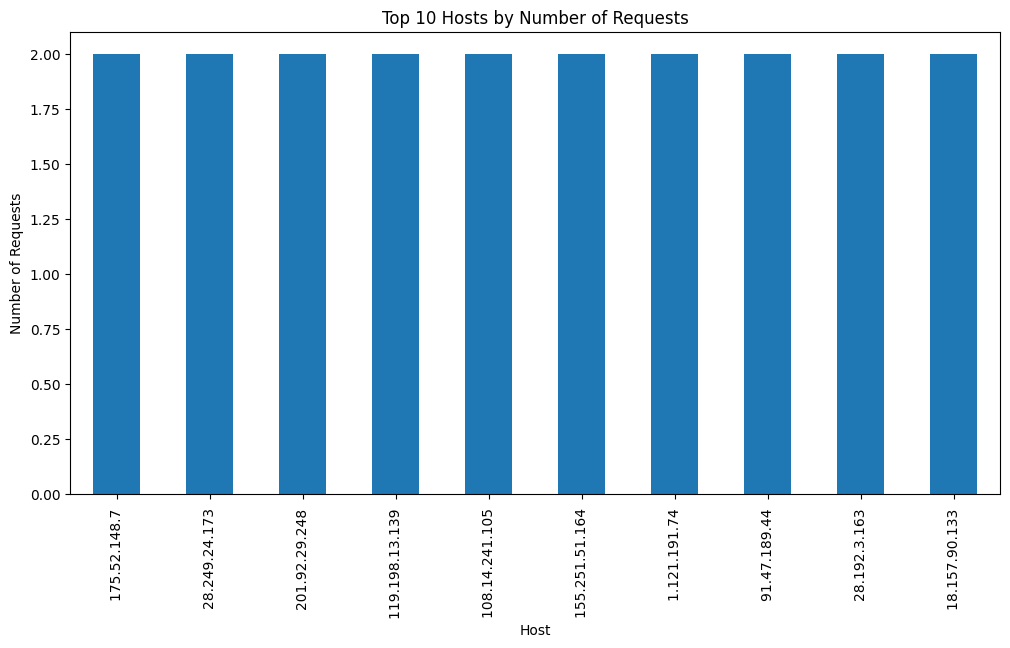

In [17]:
# Bar plot of the top 10 hosts with the most requests
top_hosts = df_requests_per_host['host'].value_counts().head(10)
top_hosts.plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Hosts by Number of Requests')
plt.xlabel('Host')
plt.ylabel('Number of Requests')
plt.show()

In [22]:
parquet_files = glob.glob(parquet_base_path+'/endpoints/*.parquet')

# Initialize an empty DataFrame
df_requests_per_endpoint = pd.DataFrame()

# Loop through the list of Parquet files and append each file to the DataFrame
for file in parquet_files:
    df_requests_per_endpoint = df_requests_per_endpoint.append(pd.read_parquet(file), ignore_index=True)

/var/folders/f4/x8rpzln53m74t22gm11_r1f80000gn/T/ipykernel_67500/741501588.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_requests_per_endpoint = df_requests_per_endpoint.append(pd.read_parquet(file), ignore_index=True)
/var/folders/f4/x8rpzln53m74t22gm11_r1f80000gn/T/ipykernel_67500/741501588.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_requests_per_endpoint = df_requests_per_endpoint.append(pd.read_parquet(file), ignore_index=True)
/var/folders/f4/x8rpzln53m74t22gm11_r1f80000gn/T/ipykernel_67500/741501588.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_requests_per_endpoint = df_requests_per_endpoint.append(pd.read_parquet(file), ignore_index=True)


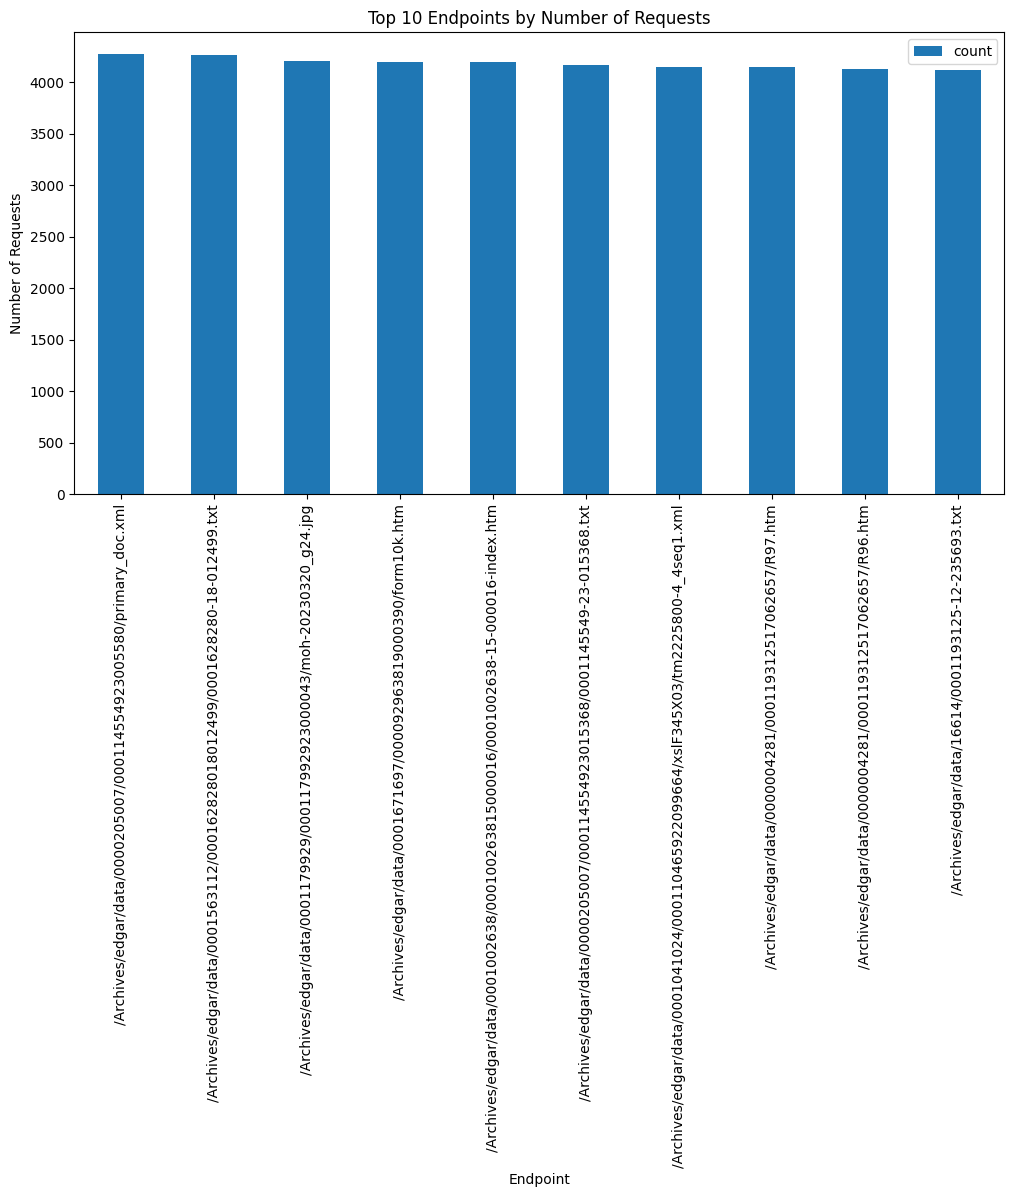

In [25]:
# Group by 'endpoint', sum 'count'
df_endpoints = df_requests_per_endpoint.groupby('endpoint')['count'].sum().reset_index()

# Sort by 'count' and take the top 10
df_endpoints = df_endpoints.sort_values('count', ascending=False).head(10)

# Plotting
df_endpoints.plot(x='endpoint', y='count', kind='bar', figsize=(12,6))
plt.title('Top 10 Endpoints by Number of Requests')
plt.xlabel('Endpoint')
plt.ylabel('Number of Requests')
plt.show()

In [ ]:
# Load the Parquet files
df_requests_per_host = pd.read_parquet('path_to_requests_per_host.parquet')
df_requests_per_endpoint = pd.read_parquet('path_to_requests_per_endpoint.parquet')
df_requests_per_status = pd.read_parquet('path_to_requests_per_status.parquet')
df_requests_per_content_size = pd.read_parquet('content_size.parquet')
df_requests_per_protocol = pd.read_parquet('path_to_requests_per_protocol.parquet')
df_requests_per_method = pd.read_parquet('path_to_requests_per_method.parquet')